<a href="https://colab.research.google.com/github/Almonfrey/MAI-Course/blob/main/class_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix
import seaborn as sns

Downloading data

In [2]:
# Download data
url = "https://raw.githubusercontent.com/Almonfrey/MAI-Course/main/data/housing.csv"
df = pd.read_csv(url)

df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


Data information

In [3]:
# Display data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Count the number of values in each categorical category
df["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [5]:
# Compute some statistical information
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


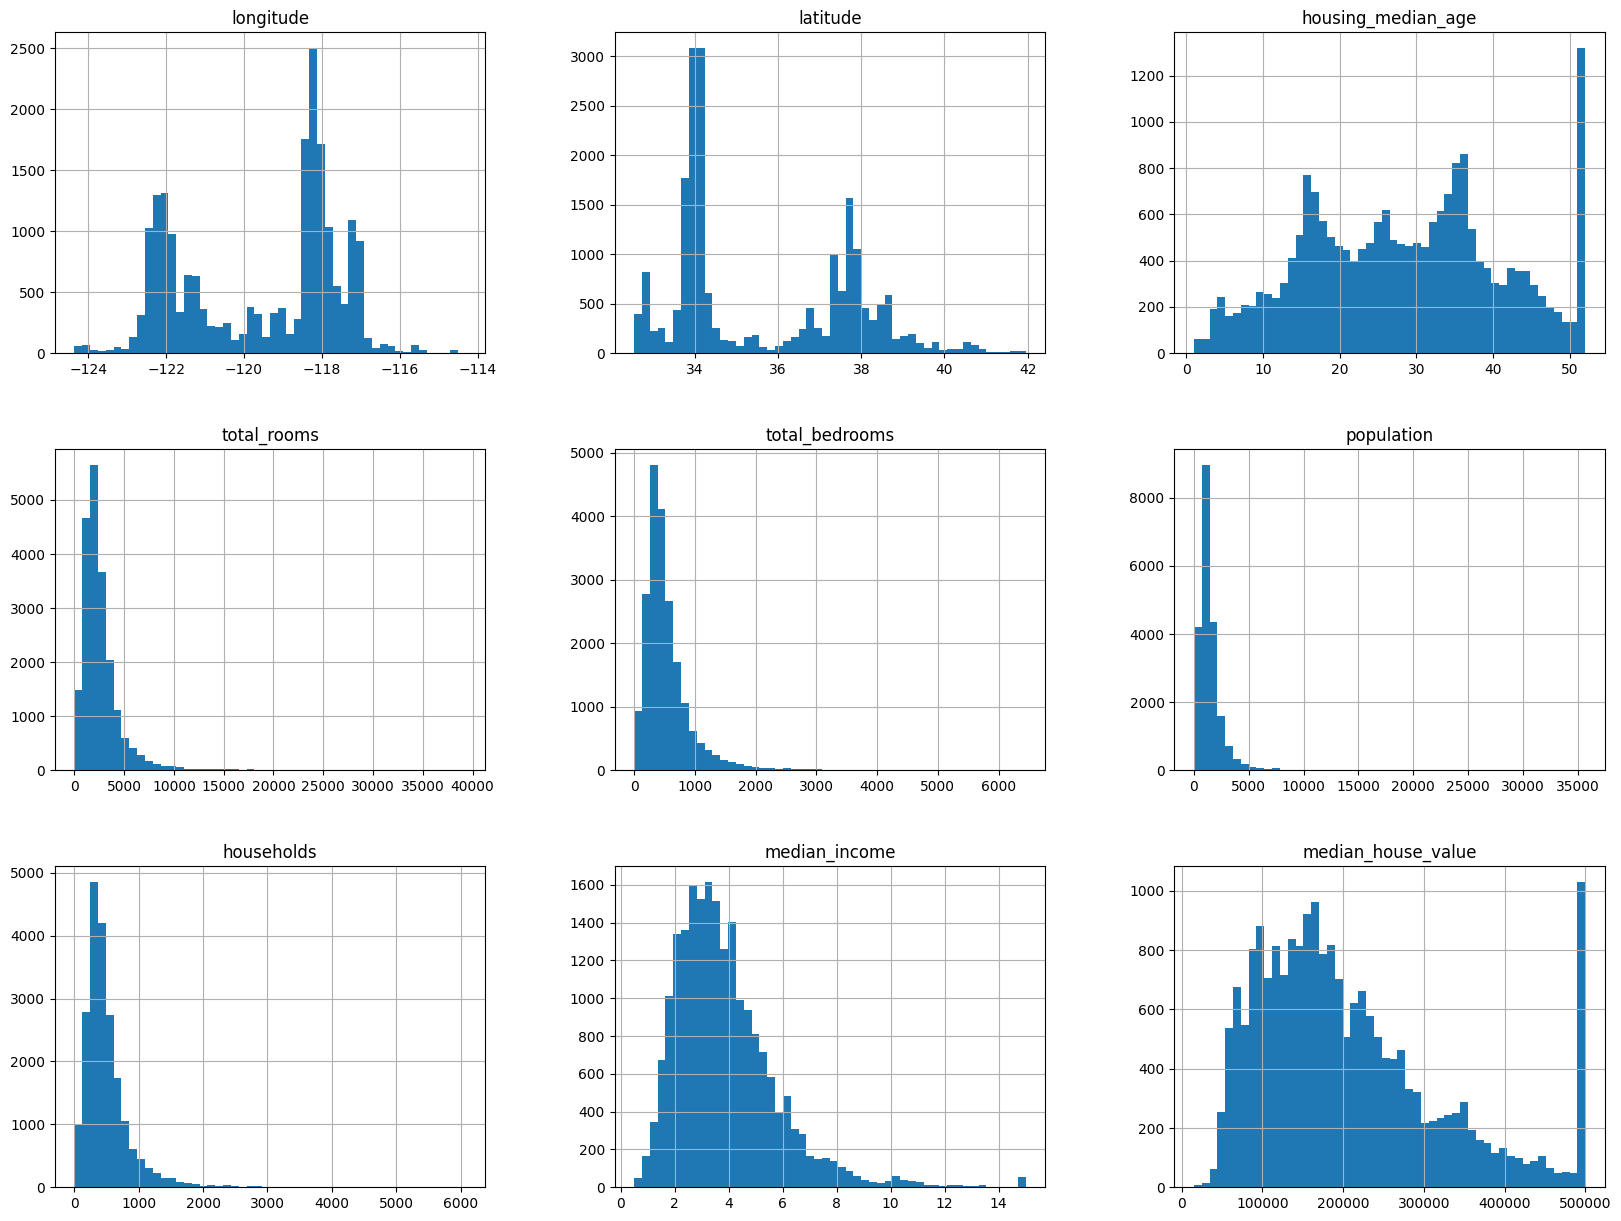

In [6]:
# Computing histograms
df.hist(bins=50, figsize=(20,15))
plt.show()

Data Preprocessing

In [7]:
train_set, temp_set = train_test_split(df, test_size=0.3, random_state=42)
val_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

print(f"Train set size: {len(train_set)}")
print(f"Validation set size: {len(val_set)}")
print(f"Test set size: {len(test_set)}")

# Create label vectors
train_targets = train_set["median_house_value"].copy()
train_set = train_set.drop("median_house_value", axis=1)

test_targets = test_set["median_house_value"].copy()
test_set = test_set.drop("median_house_value", axis=1)

val_targets = val_set["median_house_value"].copy()
val_set = val_set.drop("median_house_value", axis=1)


Train set size: 14448
Validation set size: 3096
Test set size: 3096


In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14448 entries, 7061 to 15795
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14316 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


Handling Not a Number (NaN), None and missing values

In [9]:
# Drop rows (samples) with None, NaN and missing values
df2 = train_set.copy()
df2.dropna(subset=["total_bedrooms"], axis=0, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14316 entries, 7061 to 15795
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14316 non-null  float64
 1   latitude            14316 non-null  float64
 2   housing_median_age  14316 non-null  float64
 3   total_rooms         14316 non-null  float64
 4   total_bedrooms      14316 non-null  float64
 5   population          14316 non-null  float64
 6   households          14316 non-null  float64
 7   median_income       14316 non-null  float64
 8   ocean_proximity     14316 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


Drop colums (features) with missing values

In [10]:
# Drop the column identified with missing values
df2 = train_set.copy()
df2.drop("total_bedrooms", axis=1, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14448 entries, 7061 to 15795
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   population          14448 non-null  float64
 5   households          14448 non-null  float64
 6   median_income       14448 non-null  float64
 7   ocean_proximity     14448 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1015.9+ KB


Imputation - fill the missing values with the median

In [11]:
# Imputation with the median
df2 = train_set.copy()

# Separate numerical and non-numerical columns
num_df = df2.select_dtypes(include=[np.number])
non_num_df = df2.select_dtypes(exclude=[np.number])

# Impute only numerical columns with median (can be "mean", "most_frequent", etc.)
imputer = SimpleImputer(strategy="median")
num_imputed = imputer.fit_transform(num_df)

# Put imputed numerical data back into a DataFrame
num_df_imputed = pd.DataFrame(num_imputed, columns=num_df.columns, index=num_df.index)

# Concatenate back with the non-numerical columns
df2 = pd.concat([num_df_imputed, non_num_df], axis=1)

# Check result
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14448 entries, 7061 to 15795
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14448 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


Handling categorical values

In [12]:
# Categorical feature
housing_cat = train_set[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
7061,<1H OCEAN
14689,INLAND
17323,INLAND
10056,<1H OCEAN
15750,NEAR OCEAN
15283,<1H OCEAN
18551,NEAR BAY
7555,INLAND


Integer encoding

In [13]:
# Ordinal (integer) encoding
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

# Display the mapping of categories to integers
print(ordinal_encoder.categories_)

# Show the first 8 encoded samples
housing_cat_encoded[:8]


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


array([[0.],
       [1.],
       [1.],
       [0.],
       [4.],
       [0.],
       [3.],
       [1.]])

One hot encoding

In [14]:
# One-hot encoding
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

# Convert the sparse matrix (for display)
print(housing_cat_1hot.toarray())

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


Data visualization

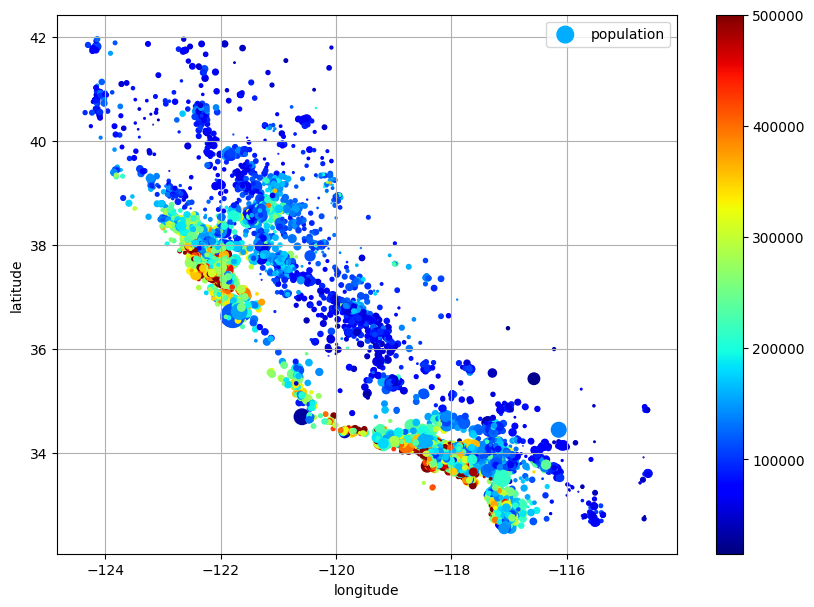

In [15]:
# Data visualization
train_set.plot(
    kind="scatter", x="longitude", y="latitude", grid=True,
    s=train_set["population"] / 100, label="population",
    c=train_targets, cmap="jet", colorbar=True, legend=True,
    sharex=False, figsize=(10, 7)
)
plt.show()

Looking for correlations

In [16]:
# Concatenate the target with the features again
df2 = pd.concat([train_set, train_targets], axis=1)

# Remove the categorical
df2.drop("ocean_proximity", axis=1, inplace=True)

# Compute and display correlations
corr_matrix = df2.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.685408
total_rooms,0.134065
housing_median_age,0.099187
households,0.066905
total_bedrooms,0.050950
population,-0.024060
longitude,-0.042203
latitude,-0.147936


Displaying correlation graph

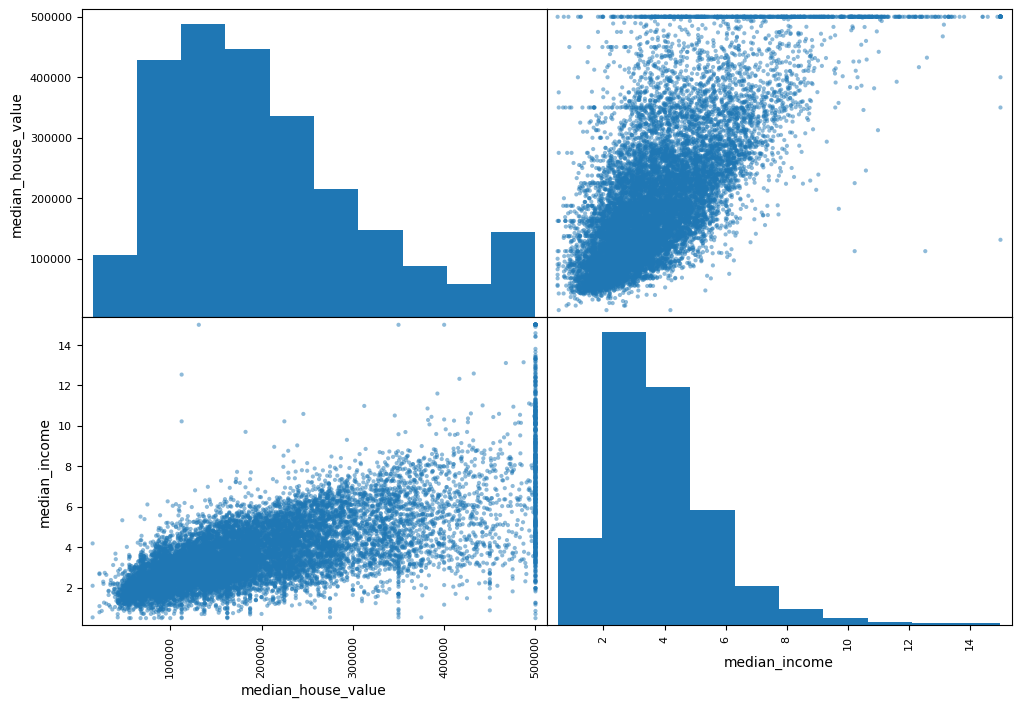

In [17]:
# Concatenate the target with the features again
df2 = pd.concat([train_set, train_targets], axis=1)

# Compute correlations
features = ["median_house_value", "median_income"]
scatter_matrix(df2[features], figsize=(12, 8))
plt.show()

Violin graph

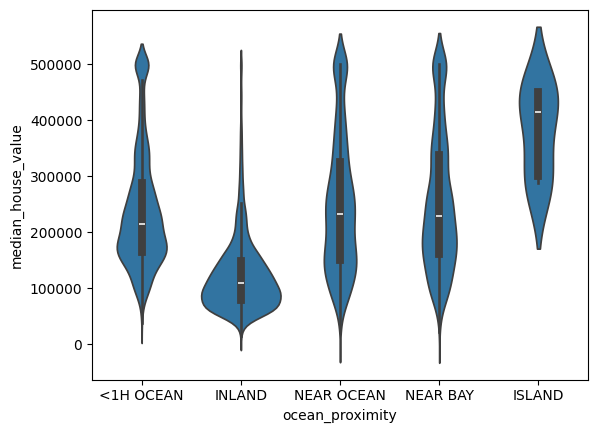

In [18]:
# Concatenate the target with the features again
df2 = pd.concat([train_set, train_targets], axis=1)

#Violin plot
sns.violinplot(x="ocean_proximity", y="median_house_value", data=df2)
plt.show()

Scalind and normalization

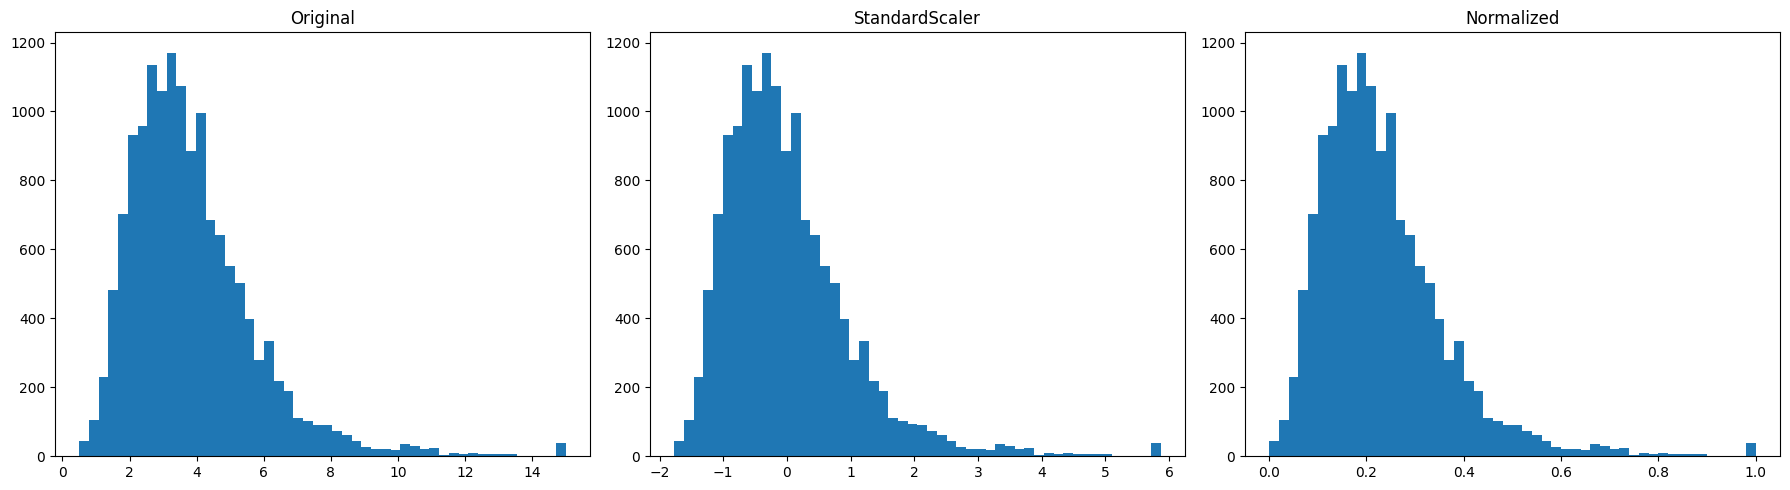

In [20]:
# Apply scalers
scaled_data = StandardScaler().fit_transform(train_set[['median_income']])
normalized_data = MinMaxScaler().fit_transform(train_set[['median_income']])

# Create subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Displaying histograms
axes[0].hist(train_set[['median_income']], bins=50); axes[0].set_title("Original")
axes[1].hist(scaled_data, bins=50); axes[1].set_title("StandardScaler")
axes[2].hist(normalized_data, bins=50); axes[2].set_title("Normalized")

plt.tight_layout()
plt.show()

Feature engineering

In [22]:
# Concatenate the target with the features again
df2 = pd.concat([train_set, train_targets], axis=1)

# Remove the categorical
df2.drop("ocean_proximity", axis=1, inplace=True)

# Feature engineering (combination)
df2["rooms_per_house"] = df2["total_rooms"] / df2["households"]
df2["bedrooms_ratio"] = df2["total_bedrooms"] / df2["total_rooms"]
df2["people_per_house"] = df2["population"] / df2["households"]

# Displaying correlation
corr_matrix = df2.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.685408
rooms_per_house,0.150333
total_rooms,0.134065
housing_median_age,0.099187
households,0.066905
total_bedrooms,0.050950
population,-0.024060
people_per_house,-0.030979
longitude,-0.042203
